#First Implementation

In [ ]:
!unzip /content/git_web_ml.zip

Archive:  /content/git_web_ml.zip
   creating: git_web_ml/
  inflating: git_web_ml/musae_git_edges.csv  
  inflating: git_web_ml/musae_git_features.json  
  inflating: git_web_ml/musae_git_target.csv  
  inflating: git_web_ml/citing.txt   
  inflating: git_web_ml/README.txt   


##Importing Files

In [ ]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
df1 = pd.read_csv('/content/musae_git_edges.csv')
df2 = pd.read_csv('/content/musae_git_target.csv')

In [ ]:
print(df1.shape)
print(df2.shape)

(289003, 2)
(37700, 3)


##Constructing Graph

In [ ]:
import pandas as pd
import networkx as nx



# Convert the DataFrame into a list of tuples
edge_list = [tuple(x) for x in df1.values]

# Create a graph object
G = nx.Graph()

# Add the edges to the graph object
G.add_edges_from(edge_list)

In [ ]:
print(G)

Graph with 37700 nodes and 289003 edges


In [ ]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)

Number of nodes: 37700
Number of edges: 289003


In [ ]:
degree = dict(G.degree())
print("Degree of nodes:", degree)

Degree of nodes: {0: 1, 23977: 32, 1: 8, 34526: 2, 2370: 40, 14683: 106, 29982: 489, 21142: 689, 20363: 405, 23830: 34, 34035: 2, 6067: 2, 19720: 39, 20183: 3, 3: 5, 4950: 1, 18029: 29, 3358: 20, 34935: 29, 5916: 19, 4: 2, 2865: 3, 9342: 7, 5: 1, 27803: 7085, 6: 6, 18612: 19, 18876: 302, 31890: 9458, 17647: 56, 18562: 350, 7: 8, 37493: 105, 33643: 534, 30199: 667, 35773: 3324, 11273: 148, 12775: 23, 21864: 299, 9051: 1797, 34957: 8, 21395: 18, 9891: 29, 9340: 41, 31260: 19, 14820: 5, 26666: 331, 22516: 12, 8: 8, 19253: 1404, 11083: 101, 23973: 103, 36652: 2343, 10080: 558, 14003: 167, 4793: 209, 9: 7, 15477: 14, 23914: 22, 33129: 2, 27768: 3, 19407: 7, 30596: 77, 10: 66, 35842: 12, 23589: 967, 37280: 13, 2078: 1368, 23670: 16, 32836: 45, 34238: 66, 19345: 27, 19973: 7, 29557: 133, 33138: 102, 35762: 47, 4708: 17, 15495: 118, 10487: 84, 12102: 92, 27313: 22, 27450: 572, 19222: 2958, 7843: 11, 19256: 27, 14478: 19, 26143: 15, 12894: 55, 11514: 32, 16321: 297, 35633: 75, 22564: 70, 22666:

In [ ]:
pip install node2vec


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 70.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 65.7 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.0
    Uninstalling networkx-3.0:
      Successfully uninstalled networkx-3.0
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


##Generating node embeddings

In [ ]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from node2vec import Node2Vec as n2v
sns.set()

In [ ]:
Y =  pd.read_csv('/content/musae_git_target.csv')
print(Y.shape)

(37700, 3)


In [ ]:
g_emb = n2v(G, dimensions=16) 

WINDOW = 1 # Node2Vec fit window
MIN_COUNT = 1 # Node2Vec min. count
BATCH_WORDS = 4 # Node2Vec batch words

mdl = g_emb.fit(
    window=WINDOW,
    min_count=MIN_COUNT,
    batch_words=BATCH_WORDS
)

emb_df = (
    pd.DataFrame(
        [mdl.wv.get_vector(str(n)) for n in G.nodes()],
        index = G.nodes
    )
)


Computing transition probabilities:   0%|          | 0/37700 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [20:23<00:00, 122.37s/it]


In [ ]:
print(emb_df)

             0         1         2         3         4         5         6   \
0      0.722854 -0.196219 -0.113471  1.713024  0.569683  0.710755  1.723698   
23977  0.658150  0.378414  0.090734  1.733498  0.972907  0.241497  1.509877   
1     -2.457185  0.692836 -0.146754  0.709587  1.337519  1.989354  2.205367   
34526 -1.195027 -0.294564  1.489975  0.725682  0.582125 -0.309822  1.664955   
2370  -1.672316  0.682408  2.043554  1.891425  1.912180  1.715800  0.720965   
...         ...       ...       ...       ...       ...       ...       ...   
35174 -1.005757 -0.416867  0.574003  1.320544  1.134814  0.635177  1.134406   
37485  0.738800 -0.868206  1.114485  0.542128  0.137723 -0.616728  2.141780   
37431 -0.304076 -0.296307 -0.387067  2.040163  0.843494 -0.465197  0.883365   
37409  0.043153 -0.850525 -0.524143  0.946805  0.480556 -0.332007  2.041330   
25879  0.388823 -0.897838 -0.195134  0.993526  0.143306  0.607449  1.271974   

             7         8         9         10      

In [ ]:
print(Y.head(5))

   id          name  ml_target
0   0        Eiryyy          0
1   1    shawflying          0
2   2   JpMCarrilho          1
3   3     SuhwanCha          0
4   4  sunilangadi2          1


In [ ]:
emb_df = emb_df.merge(
    Y[['id', 'ml_target']].set_index('id'),
    left_index = True,
    right_index = True
)

emb_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,ml_target
0,0.722854,-0.196219,-0.113471,1.713024,0.569683,0.710755,1.723698,-0.129450,1.023080,0.488159,-0.804937,0.233693,0.826797,-0.573182,-0.326978,-0.125157,0
23977,0.658150,0.378414,0.090734,1.733498,0.972907,0.241497,1.509877,0.643510,0.764957,0.501470,-1.678868,1.079286,0.282137,-0.581657,-0.580272,-0.287867,0
1,-2.457185,0.692836,-0.146754,0.709587,1.337519,1.989354,2.205367,0.525065,0.972292,-1.509488,1.567007,-0.761563,-1.002726,-2.287595,-2.482865,-1.215979,0
34526,-1.195027,-0.294564,1.489975,0.725682,0.582125,-0.309822,1.664955,0.475608,0.235366,0.612394,-0.476103,0.037206,0.718008,-2.338549,-1.565486,0.436837,0
2370,-1.672316,0.682408,2.043554,1.891425,1.912180,1.715800,0.720965,0.504508,-0.124804,0.136790,0.616796,-0.876827,0.916643,-1.026247,-1.727112,-0.338248,0


In [ ]:
print(emb_df.shape)

(37700, 17)


##Classification Algorithms

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, matthews_corrcoef, confusion_matrix, classification_report

In [ ]:
ft_cols = emb_df.drop(columns = ['ml_target']).columns.tolist()
print(ft_cols)
target_col = 'ml_target'

# train test split
x = emb_df[ft_cols].values
y = emb_df[target_col].values

x_train, x_test, y_train, y_test = train_test_split(
    x, 
    y,
    test_size = 0.3
)

# GBC classifier
clf = GradientBoostingClassifier()

# train the model
clf.fit(x_train, y_train)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


GradientBoostingClassifier()

In [ ]:

def clf_eval(clf, x_test, y_test):
    '''
    This function will evaluate a sk-learn multi-class classification model based on its
    x_test and y_test values
    
    params:
        clf (Model) : The model you wish to evaluate the performance of
        x_test (Array) : Result of the train test split
        y_test (Array) : Result of the train test split
    
    returns:
        This function will return the following evaluation metrics:
            - Accuracy Score
            - Matthews Correlation Coefficient
            - Classification Report
            - Confusion Matrix
    
    example:
        clf_eval(
            clf,
            x_test,
            y_test
        )
    '''
    y_pred = clf.predict(x_test)
    y_true = y_test
    
    y_pred = clf.predict(x_test)
    test_acc = accuracy_score(y_test, y_pred)
    print("Testing Accuracy : ", test_acc)
    
    
    
    
    
    print(confusion_matrix(y_pred,y_test))
    
clf_eval(
    clf,
    x_test,
    y_test
)

Testing Accuracy :  0.8440318302387267
[[7914 1345]
 [ 419 1632]]


In [ ]:
print(y)

[0 0 0 ... 0 1 0]


In [ ]:
import csv

In [ ]:
filename = "embedding file"
    
# writing to csv file 
with open(filename, 'w') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile) 
        
    # writing the fields 
    
        
  

In [ ]:
emb_df.to_csv('/content/university_records.csv')

In [ ]:
df3 = pd.read_csv('/content/university_records.csv')
print(df3.shape)

(37700, 18)


In [ ]:
print(df3.head(5))

   Unnamed: 0         0         1         2         3         4         5  \
0           0  0.722854 -0.196219 -0.113471  1.713024  0.569683  0.710755   
1       23977  0.658150  0.378414  0.090734  1.733499  0.972907  0.241497   
2           1 -2.457185  0.692836 -0.146754  0.709587  1.337519  1.989354   
3       34526 -1.195026 -0.294564  1.489975  0.725682  0.582125 -0.309822   
4        2370 -1.672316  0.682408  2.043554  1.891425  1.912180  1.715800   

          6         7         8         9        10        11        12  \
0  1.723698 -0.129450  1.023080  0.488159 -0.804937  0.233693  0.826797   
1  1.509877  0.643510  0.764957  0.501470 -1.678868  1.079286  0.282137   
2  2.205367  0.525065  0.972292 -1.509488  1.567007 -0.761563 -1.002726   
3  1.664955  0.475608  0.235366  0.612394 -0.476103  0.037206  0.718008   
4  0.720965  0.504508 -0.124804  0.136790  0.616796 -0.876827  0.916643   

         13        14        15  ml_target  
0 -0.573182 -0.326978 -0.125157          

<Axes: xlabel='ml_target', ylabel='count'>

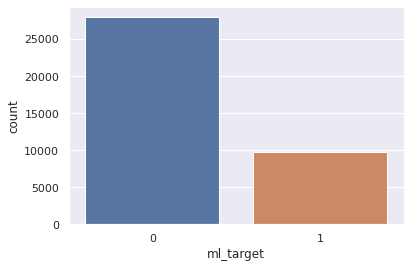

In [ ]:
sns.countplot(x = 'ml_target', data = Y)

#Second Implementation

In [ ]:
!unzip /content/github.zip

Archive:  /content/github.zip
   creating: git_web_ml/
  inflating: git_web_ml/musae_git_edges.csv  
  inflating: git_web_ml/musae_git_features.json  
  inflating: git_web_ml/musae_git_target.csv  
  inflating: git_web_ml/citing.txt   
  inflating: git_web_ml/README.txt   


In [ ]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
df1 = pd.read_csv('/content/musae_git_edges.csv')
df2 = pd.read_csv('/content/musae_git_target.csv')

In [ ]:
!pip install node2vec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 41.5 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.0
    Uninstalling networkx-3.0:
      Successfully uninstalled networkx-3.0
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
#from node2vec import Node2Vec as n2v
sns.set()

In [ ]:
Y =  pd.read_csv('/content/musae_git_target.csv')
print(Y.shape)


(37700, 3)


##Constructing graph

In [ ]:
import pandas as pd
import networkx as nx




# Convert the DataFrame into a list of tuples
edge_list = [tuple(x) for x in df1.values]

# Create a graph object
G = nx.Graph()

# Add the edges to the graph object
G.add_edges_from(edge_list)

In [ ]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)

Number of nodes: 37700
Number of edges: 289003


##Generating embeddings

In [ ]:
g_emb = n2v(G, dimensions=20) #used 16 

WINDOW = 1 # Node2Vec fit window
MIN_COUNT = 1 # Node2Vec min. count
BATCH_WORDS = 4 # Node2Vec batch words

mdl = g_emb.fit(
    window=WINDOW,
    min_count=MIN_COUNT,
    batch_words=BATCH_WORDS
)

emb_df = (
    pd.DataFrame(
        [mdl.wv.get_vector(str(n)) for n in G.nodes()],
        index = G.nodes
    )
)


Computing transition probabilities:   0%|          | 0/37700 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [20:19<00:00, 121.95s/it]


In [ ]:
embeddings = emb_df.sort_index()

In [ ]:
print(embeddings)

             0         1         2         3         4         5         6   \
0     -0.509542  0.153380  0.802114 -0.190900  0.503011 -0.754202 -0.532281   
1     -0.272436  0.235910 -0.021627  1.189891  1.596285 -1.028932  1.641277   
2     -0.297062  0.844488  1.032015  0.339205  1.298599  0.038211  0.867156   
3     -1.536512  1.048589  2.535596 -1.749081  1.048049 -0.471654  1.979214   
4     -0.204986 -0.634098  0.266802 -0.470657  0.106608 -1.047309 -0.427129   
...         ...       ...       ...       ...       ...       ...       ...   
37695 -0.055464 -0.020524 -0.452840 -0.126165  0.845967 -0.648364  0.281212   
37696 -0.224939  0.322870  0.840568  0.620016  0.426750 -0.992002  0.733888   
37697  0.653802  1.836673  1.043744 -0.498865  0.816367  0.255366  0.590616   
37698 -0.338360  0.408263  1.693806  1.758077  0.414096 -1.515277 -0.326895   
37699 -0.142917  1.166353  0.721580 -0.878019 -0.371098  0.115004  0.415835   

             7         8         9         10      

##Loading Embeddings which were previously saved in the csv file with 20 dimensions

In [ ]:
emb_df = pd.read_csv('/content/emb2.csv')
print(emb_df.shape)

(37700, 22)


In [ ]:
emb_df.head(5)
embeddings = emb_df.iloc[:, 1:23]
print(embeddings.shape)

(37700, 21)


In [ ]:
#embeddings = emb_df.sort_index()

In [ ]:
print(embeddings.head(5))

          0         1         2         3         4         5         6  \
0 -0.066535  0.961103  0.813411  0.527102 -0.093266  0.015194 -0.300295   
1 -0.819464 -0.274053 -0.157407  1.179084  0.683545 -0.856692  2.437289   
2 -0.611190  0.149614  1.216677 -0.158407  0.405769  0.208947  0.478648   
3 -2.026659  1.117157  0.689291 -1.389609  1.002907  0.788296 -0.427299   
4 -0.723313 -1.562716 -0.113795 -0.523350  0.686711 -0.830562 -1.274688   

          7         8         9  ...        11        12        13        14  \
0 -0.036090  0.144047  1.825576  ... -0.271434  0.074452 -1.492842  0.940949   
1  1.958928 -0.842023  0.049033  ...  0.423999 -0.195649 -1.518129  1.982705   
2  1.093824  0.491046  0.250589  ... -1.197210 -0.847526  0.387010  1.625483   
3  0.507792 -0.604159 -0.299021  ... -2.088221  0.670670 -1.057597  1.884078   
4  0.618004 -1.521431  0.051453  ...  0.632738 -0.233973 -1.078374  1.653875   

         15        16        17        18        19  ml_target  
0 -

In [ ]:
ft_cols = embeddings.drop(columns = ['ml_target']).columns.tolist()
target_col = 'ml_target'

In [ ]:
print(ft_cols)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19']


In [ ]:
print(target_col)

ml_target


In [ ]:
x = embeddings[ft_cols].values
y = embeddings[target_col].values

In [ ]:
print("The embeddings are", x)
print("The target col is" , y)

The embeddings are [[-0.06653463  0.9611031   0.81341124 ... -0.19963156 -0.6883554
  -1.3848366 ]
 [-0.81946385 -0.27405283 -0.15740724 ...  1.1908127  -0.13940498
  -2.0345416 ]
 [-0.6111905   0.14961426  1.2166767  ...  0.42449015  0.34467465
  -0.9624132 ]
 ...
 [-0.9895307   1.0001578   0.8809874  ... -0.18646309  0.23007862
  -0.94178545]
 [ 0.1138335   0.6981013  -0.087809   ...  0.47416952 -2.0630522
  -0.9883416 ]
 [-0.8007746   0.268962    0.63475    ... -0.27522182 -1.0559484
  -0.03254248]]
The target col is [0 0 1 ... 0 1 0]


##Classification

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, matthews_corrcoef, confusion_matrix, classification_report, precision_score, recall_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score

###Gradient Boosting

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x, 
    y,
    test_size = 0.3
)

In [ ]:
print(y_train)

In [ ]:
import collections, numpy
counter = collections.Counter(y_train)
print(counter)

Counter({0: 19533, 1: 6857})


In [ ]:
import numpy as np
import pandas as pd

my_array = y_train

df = pd.DataFrame(my_array)

print(df)
print(type(df))

       0
0      1
1      1
2      0
3      0
4      0
...   ..
26385  0
26386  0
26387  0
26388  1
26389  0

[26390 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>


In [ ]:


# GBC classifier
clf = GradientBoostingClassifier()

# train the model
clf.fit(x_train, y_train)

GradientBoostingClassifier()

In [ ]:
def clf_eval(clf, x_test, y_test):
    
    y_pred = clf.predict(x_test)
    y_true = y_test
    
    y_pred = clf.predict(x_test)
    test_acc = accuracy_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    print("Testing Accuracy : ", test_acc)
    print("balanced accuracy :" , balanced_accuracy)
    print("MCC Score : ", matthews_corrcoef(y_true, y_pred))
    
    


    print("Precision of the Gradient Boosting :\t"+str(precision_score(y_pred ,y_true)))
    print("Recall of the Gradient Boosting    :\t"+str(recall_score(y_pred ,y_true)))
    print("F1 Score of the Gradient Boosting :\t"+str(f1_score(y_pred ,y_true)))
clf_eval(
    clf,
    x_test,
    y_test
)

Testing Accuracy :  0.8559681697612732
balanced accuracy : 0.7640770726572508
MCC Score :  0.5950691166234511
Precision of the Gradient Boosting :	0.5766828591256072
Recall of the Gradient Boosting    :	0.8025108643167552
F1 Score of the Gradient Boosting :	0.6711084191399153


###MLP Algorithm

In [ ]:
from sklearn.neural_network import MLPClassifier
learner = MLPClassifier(hidden_layer_sizes=(200,), alpha=0.05, learning_rate="adaptive", activation='tanh', solver='adam', max_iter=500)
learner.fit(x_train, y_train)



MLPClassifier(activation='tanh', alpha=0.05, hidden_layer_sizes=(200,),
              learning_rate='adaptive', max_iter=500)

In [ ]:
def learner_eval(learner, x_test, y_test):
    
    y_pred = learner.predict(x_test)
    y_true = y_test
    
    y_pred = learner.predict(x_test)
    test_acc = accuracy_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    print("Testing Accuracy : ", test_acc)
    print("balanced accuracy :" , balanced_accuracy)
    print("MCC Score : ", matthews_corrcoef(y_true, y_pred))

    conf_matrix = confusion_matrix(y_pred ,y_true)
    print("Confusion Matrix of the Test Set" , conf_matrix)
    
    


    print("Precision of the MLP :\t"+str(precision_score(y_pred ,y_true)))
    print("Recall of the MLP   :\t"+str(recall_score(y_pred ,y_true)))
    print("F1 Score of the MLP :\t"+str(f1_score(y_pred ,y_true)))
learner_eval(
    learner,
    x_test,
    y_test
)

Testing Accuracy :  0.8569407603890362
balanced accuracy : 0.7826534976271224
MCC Score :  0.604897338860055
Confusion Matrix of the Test Set [[7873 1063]
 [ 555 1819]]
Precision of the MLP :	0.6311589174184594
Recall of the MLP   :	0.7662173546756529
F1 Score of the MLP :	0.6921613394216134


###Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

learner = RandomForestClassifier(n_estimators=100, max_depth=180, max_features=11)

learner.fit(x_train, y_train)

RandomForestClassifier(max_depth=180, max_features=11)

In [ ]:
def learner_eval(learner, x_test, y_test):
    
    y_pred = learner.predict(x_test)
    y_true = y_test
    
    y_pred = learner.predict(x_test)
    test_acc = accuracy_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    print("Testing Accuracy : ", test_acc)
    print("balanced accuracy :" , balanced_accuracy)
    print("MCC Score : ", matthews_corrcoef(y_true, y_pred))
    
    
    
    conf_matrix = confusion_matrix(y_pred ,y_true)
    print("Confusion Matrix of the Test Set")


    print("Precision of the RF :\t"+str(precision_score(y_pred ,y_true)))
    print("Recall of the RF    :\t"+str(recall_score(y_pred ,y_true)))
    print("F1 Score of the RF :\t"+str(f1_score(y_pred ,y_true)))
learner_eval(
    learner,
    x_test,
    y_test
)

Testing Accuracy :  0.8555260831122901
balanced accuracy : 0.7613829862916877
MCC Score :  0.5931447879560947
Confusion Matrix of the Test Set
Precision of the RF :	0.5693962526023595
Recall of the RF    :	0.8067846607669616
F1 Score of the RF :	0.6676159479251423


###KNN

In [ ]:
# Plotting a graph for n_neighbors 
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

number_of_neighbours = 26

knn_model = KNeighborsClassifier(number_of_neighbours) 
knn_model.fit(x_train, y_train)






KNeighborsClassifier(n_neighbors=26)

In [ ]:
def learner_eval(learner, x_test, y_test):
    
    y_pred = learner.predict(x_test)
    y_true = y_test
    
    y_pred = learner.predict(x_test)
    test_acc = accuracy_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    print("Testing Accuracy : ", test_acc)
    print("balanced accuracy :" , balanced_accuracy)
    print("MCC Score : ", matthews_corrcoef(y_true, y_pred))
    
    
    
    conf_matrix = confusion_matrix(y_pred ,y_true)
    print("Confusion Matrix of the Test Set")


    print("Precision of the RF :\t"+str(precision_score(y_pred ,y_true)))
    print("Recall of the RF    :\t"+str(recall_score(y_pred ,y_true)))
    print("F1 Score of the RF :\t"+str(f1_score(y_pred ,y_true)))
learner_eval(
    knn_model,
    x_test,
    y_test
)

Testing Accuracy :  0.8535809018567639
balanced accuracy : 0.7581244310253212
MCC Score :  0.5928327591289585
Confusion Matrix of the Test Set
Precision of the RF :	0.5593739367131677
Recall of the RF    :	0.8199501246882793
F1 Score of the RF :	0.6650485436893203


#Graph

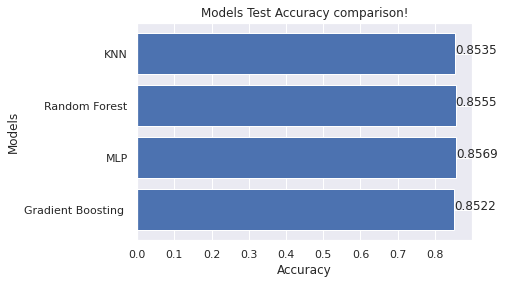

In [ ]:
import matplotlib.pyplot as plt
x = ["Gradient Boosting ", "MLP", "Random Forest", "KNN"]
y = [0.8522, 0.8569, 0.8555, 0.8535]
# naming the x-axis
plt.xlabel('Accuracy')
# naming the y-axis
plt.ylabel('Models')
# plot title
plt.title('Models Test Accuracy comparison!')
plt.barh(x, y)

for index, value in enumerate(y):
    plt.text(value, index,
             str(value))
 
plt.show()

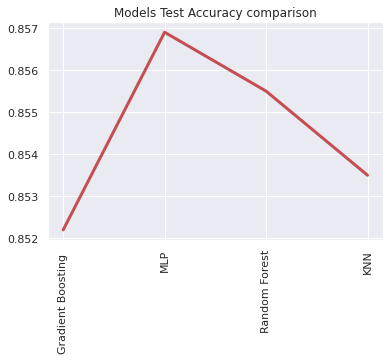

In [ ]:
models = ["Gradient Boosting ", "MLP", "Random Forest", "KNN"]
Accuracy = [0.8522, 0.8569, 0.8555, 0.8535]
plt.plot(models, Accuracy, 'r-', lw=3, label="Test Accuracy")
plt.xticks(rotation=90)
plt.title('Models Test Accuracy comparison')
plt.show()

###SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
Xtr_smote, Ytr_smote = smote.fit_resample(x_train, y_train)

In [ ]:
print(Xtr_smote)

[[-1.1424959   0.3102515   0.26509622 ...  0.90488344 -1.5906148
   0.818015  ]
 [-0.30801374 -0.5271501  -0.674195   ... -0.52783346 -0.8942681
  -1.2146263 ]
 [-0.7912834   1.0288193   0.92663807 ...  1.3088633   1.1345018
  -2.4953263 ]
 ...
 [-1.33611329 -0.63235213  0.59118153 ... -0.16985033 -1.88012526
   0.00641033]
 [ 0.54276053  0.26273568  0.14245422 ... -0.72490727 -0.45061973
  -1.06277131]
 [-1.47092113  0.56096745 -0.29861119 ... -0.28173833  0.2543322
  -1.15701622]]


In [ ]:
import csv

In [ ]:
filename = "Xtr_smote"
    
# writing to csv file 
with open(filename, 'w') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile) 
        

In [ ]:
df = pd.DataFrame(Xtr_smote)

In [ ]:
df.to_csv('/content/Xtr_smote')

In [ ]:
filename = "Ytr_smote"
    
# writing to csv file 
with open(filename, 'w') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile) 

In [ ]:
df2 = pd.DataFrame(Ytr_smote)

In [ ]:
df2.to_csv('/content/Ytr_smote')

In [ ]:
import collections, numpy
counter = collections.Counter(Ytr_smote)
print(counter)

Counter({1: 19533, 0: 19533})


In [ ]:
import collections, numpy
counter = collections.Counter(y_test)
print(counter)

Counter({0: 8375, 1: 2935})


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, matthews_corrcoef, confusion_matrix, classification_report, precision_score, recall_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score




# GBC classifier
clf = GradientBoostingClassifier()

# train the model
clf.fit(Xtr_smote, Ytr_smote)

GradientBoostingClassifier()

In [ ]:
def clf_eval(clf, x_test, y_test):
    
    y_pred = clf.predict(x_test)
    y_true = y_test
    
    y_pred = clf.predict(x_test)
    test_acc = accuracy_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    print("Testing Accuracy : ", test_acc)
    print("balanced accuracy :" , balanced_accuracy)
    print("MCC Score : ", matthews_corrcoef(y_true, y_pred))
    
    
    
    print(confusion_matrix(y_pred,y_test))
    
    conf_matrix = confusion_matrix(y_pred ,y_true)
    print("Confusion Matrix of the Test Set")


    print("Precision of the Gradient Boosting :\t"+str(precision_score(y_pred ,y_true)))
    print("Recall of the Gradient Boosting    :\t"+str(recall_score(y_pred ,y_true)))
    print("F1 Score of the MLP :\t"+str(f1_score(y_pred ,y_true)))
clf_eval(
    clf,
    x_test,
    y_test
)

Testing Accuracy :  0.8202475685234306
balanced accuracy : 0.8014157230763455
MCC Score :  0.5661002010504029
[[7078  683]
 [1350 2199]]
Confusion Matrix of the Test Set
Precision of the Gradient Boosting :	0.7630117973629424
Recall of the Gradient Boosting    :	0.6196111580726965
F1 Score of the Gradient Boosting :	0.6838749805628984


#MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
learner = MLPClassifier(hidden_layer_sizes=(200,), alpha=0.05, learning_rate="adaptive", activation='tanh', solver='adam', max_iter=500)
learner.fit(Xtr_smote, Ytr_smote)

MLPClassifier(activation='tanh', alpha=0.05, hidden_layer_sizes=(200,),
              learning_rate='adaptive', max_iter=500)

In [ ]:
def learner_eval(learner, x_test, y_test):
    
    y_pred = learner.predict(x_test)
    y_true = y_test
    
    y_pred = learner.predict(x_test)
    test_acc = accuracy_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    print("Testing Accuracy : ", test_acc)
    print("balanced accuracy :" , balanced_accuracy)
    print("MCC Score : ", matthews_corrcoef(y_true, y_pred))
    
    
    
    print(confusion_matrix(y_pred,y_test))
    
    conf_matrix = confusion_matrix(y_pred ,y_true)
    print("Confusion Matrix of the Test Set")


    print("Precision of the MLP:\t"+str(precision_score(y_pred ,y_true)))
    print("Recall of the MLP    :\t"+str(recall_score(y_pred ,y_true)))
    print("F1 Score of the MLP :\t"+str(f1_score(y_pred ,y_true)))
learner_eval(
    learner,
    x_test,
    y_test
)

Testing Accuracy :  0.8217506631299735
balanced accuracy : 0.7938619228657523
MCC Score :  0.5593890245128131
[[7170  758]
 [1258 2124]]
Confusion Matrix of the Test Set
Precision of the Gradient Boosting :	0.7369882026370576
Recall of the Gradient Boosting    :	0.6280307510348906
F1 Score of the Gradient Boosting :	0.6781609195402298


#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

learner = RandomForestClassifier(n_estimators=100, max_depth=180, max_features=11)

learner.fit(Xtr_smote, Ytr_smote)

RandomForestClassifier(max_depth=180, max_features=11)

In [ ]:
def learner_eval(learner, x_test, y_test):
    
    y_pred = learner.predict(x_test)
    y_true = y_test
    
    y_pred = learner.predict(x_test)
    test_acc = accuracy_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    print("Testing Accuracy : ", test_acc)
    print("balanced accuracy :" , balanced_accuracy)
    print("MCC Score : ", matthews_corrcoef(y_true, y_pred))
    
    
    
    print(confusion_matrix(y_pred,y_test))
    
    conf_matrix = confusion_matrix(y_pred ,y_true)
    print("Confusion Matrix of the Test Set")


    print("Precision of the RF :\t"+str(precision_score(y_pred ,y_true)))
    print("Recall of the RF   :\t"+str(recall_score(y_pred ,y_true)))
    print("F1 Score of the RF :\t"+str(f1_score(y_pred ,y_true)))
learner_eval(
    learner,
    x_test,
    y_test
)

Testing Accuracy :  0.8419098143236075
balanced accuracy : 0.7895785898562901
MCC Score :  0.5818395448406439
[[7554  914]
 [ 874 1968]]
Confusion Matrix of the Test Set
Precision of the Gradient Boosting :	0.6828591256072172
Recall of the Gradient Boosting    :	0.6924700914848698
F1 Score of the Gradient Boosting :	0.6876310272536688


#KNN

In [ ]:
# Plotting a graph for n_neighbors 
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

number_of_neighbours = 26

knn_model = KNeighborsClassifier(number_of_neighbours) 
knn_model.fit(Xtr_smote, Ytr_smote)

KNeighborsClassifier(n_neighbors=26)

In [ ]:
def learner_eval(learner, x_test, y_test):
    
    y_pred = learner.predict(x_test)
    y_true = y_test
    
    y_pred = learner.predict(x_test)
    test_acc = accuracy_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    print("Testing Accuracy : ", test_acc)
    print("balanced accuracy :" , balanced_accuracy)
    print("MCC Score : ", matthews_corrcoef(y_true, y_pred))
    
    
    
    conf_matrix = confusion_matrix(y_pred ,y_true)
    print("Confusion Matrix of the Test Set")


    print("Precision of the KNN :\t"+str(precision_score(y_pred ,y_true)))
    print("Recall of the KNN    :\t"+str(recall_score(y_pred ,y_true)))
    print("F1 Score of the KNN :\t"+str(f1_score(y_pred ,y_true)))
learner_eval(
    knn_model,
    x_test,
    y_test
)

Testing Accuracy :  0.7809902740937223
balanced accuracy : 0.7914414055004215
MCC Score :  0.5261719393353543
Confusion Matrix of the Test Set
Precision of the RF :	0.8132017693092889
Recall of the RF    :	0.5534969893469198
F1 Score of the RF :	0.6586743833540031


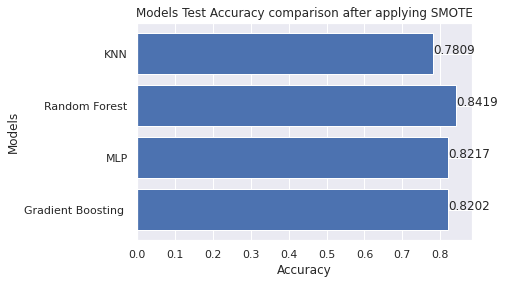

In [ ]:
import matplotlib.pyplot as plt
x = ["Gradient Boosting ", "MLP", "Random Forest", "KNN"]
y = [0.8202, 0.8217, 0.8419, 0.7809]
# naming the x-axis
plt.xlabel('Accuracy')
# naming the y-axis
plt.ylabel('Models')
# plot title
plt.title('Models Test Accuracy comparison after applying SMOTE')
plt.barh(x, y)

for index, value in enumerate(y):
    plt.text(value, index,
             str(value))
 
plt.show()

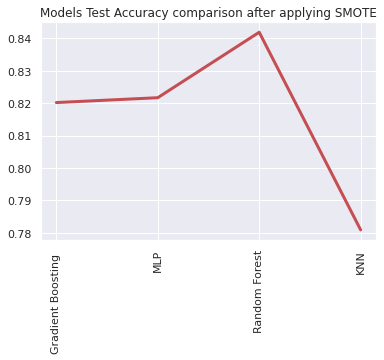

In [ ]:
models = ["Gradient Boosting ", "MLP", "Random Forest", "KNN"]
Accuracy = [0.8202, 0.8217, 0.8419, 0.7809]
plt.plot(models, Accuracy, 'r-', lw=3, label="Test Accuracy")
plt.xticks(rotation=90)
plt.title('Models Test Accuracy comparison after applying SMOTE')
plt.show()

In [ ]:
import csv 

###Cross Validation

In [ ]:
# cv 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold



model = RandomForestClassifier(n_estimators=100, max_depth=180, max_features=11)
for splits in range(2,10):
    cv = RepeatedStratifiedKFold(n_splits=splits, n_repeats=3, random_state=1)
    n_scores = cross_val_score(model, Xtr_smote, Ytr_smote, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    # report performance
    print(f"Split {splits}")
    print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Split 2
Accuracy: 0.866 (0.001)
Split 3
Accuracy: 0.879 (0.003)
Split 4
Accuracy: 0.882 (0.003)
Split 5
Accuracy: 0.886 (0.003)
Split 6
Accuracy: 0.889 (0.004)
Split 7
Accuracy: 0.890 (0.004)
Split 8
Accuracy: 0.891 (0.003)
Split 9
Accuracy: 0.891 (0.005)


In [ ]:
# cv 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold



model = RandomForestClassifier(n_estimators=100, max_depth=180, max_features=11)
for splits in range(2,10):
    cv = RepeatedStratifiedKFold(n_splits=splits, n_repeats=3, random_state=1)
    n_scores = cross_val_score(model, x_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    # report performance
    print(f"Split {splits}")
    print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Split 2
Accuracy: 0.847 (0.003)
Split 3
Accuracy: 0.849 (0.004)
Split 4
Accuracy: 0.850 (0.007)
Split 5
Accuracy: 0.850 (0.005)
Split 6
Accuracy: 0.850 (0.006)
Split 7
Accuracy: 0.850 (0.007)
Split 8
Accuracy: 0.851 (0.008)
Split 9
Accuracy: 0.851 (0.007)


In [ ]:
filename = "embedding1.csv"
    
# writing to csv file 
with open(filename, 'w') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile) 
        

In [ ]:
embeddings.to_csv('/content/embedding1.csv')